In [221]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error


<Figure size 720x360 with 0 Axes>

## Regression Example
We will use different regression models to fit the function f(x) = sin(x) + 3 (shown below).

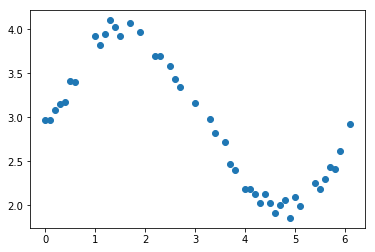

In [222]:
# Create example data set
x = np.arange(0, 2*np.pi, 0.1)
np.random.shuffle(x)

def sin_function(input):
    return np.sin(input) + 3 + np.random.normal(0, 0.1, input.size)

# Get training and testing samples
n_train = int(np.ceil(x.size * .70)) 
x_train = np.sort(x[0:n_train])
y_train = sin_function(x_train)
x_test = np.sort(x[n_train:])
y_test = sin_function(x_test)

# Plot training data
plt.plot(x_train, y_train, 'o')
plt.show()

### Linear Model
Using a linear equation (y = mx+b) to fit our function gives a poor fit.
In machine learning we call this underfitting.
In general underfitting occurs when the model capacity is not large enough to capture all the variability in the data.

Train Error: 0.2265251203157903
Test Error: 0.21796776145149432


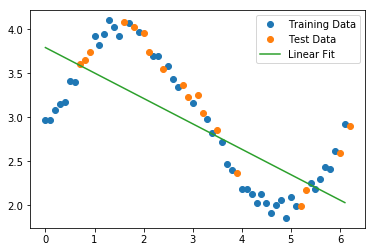

In [223]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)
y_linear = slope * x_train + intercept
y_linear_test = slope * x_test + intercept
print('Train Error: ' + str(mean_squared_error(y_train, y_linear)))
print('Test Error: ' + str(mean_squared_error(y_test, y_linear_test)))
plt.plot(x_train, y_train, 'o', x_test, y_test, 'o', x_train, y_linear)
plt.legend(['Training Data', 'Test Data', 'Linear Fit'])
plt.show()

### Polynomial Overfit

Train Error: 0.0031459068270250725
Test Error: 0.20136837609649652


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


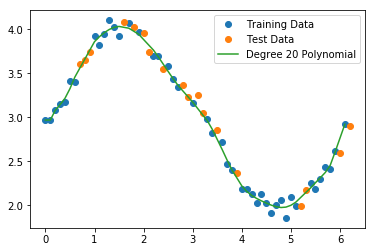

In [224]:
p20 = np.poly1d(np.polyfit(x_train, y_train, 20))
print('Train Error: ' + str(mean_squared_error(y_train, p20(x_train))))
print('Test Error: ' + str(mean_squared_error(y_test, p20(x_test))))
plt.plot(x_train, y_train, 'o', x_test, y_test, 'o', x_train, p20(x_train))
plt.legend(['Training Data', 'Test Data', 'Degree 20 Polynomial'])
plt.show()

### Polynomial Correct Fit

Train Error: 0.0037002030768053503
Test Error: 0.013443254027207847


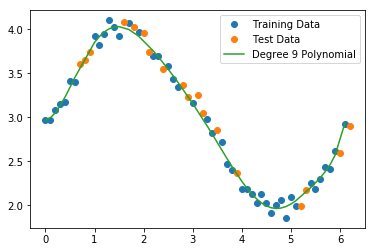

In [225]:
p9 = np.poly1d(np.polyfit(x_train, y_train, 9))
print('Train Error: ' + str(mean_squared_error(y_train, p9(x_train))))
print('Test Error: ' + str(mean_squared_error(y_test, p9(x_test))))
plt.plot(x_train, y_train, 'o', x_test, y_test, 'o', x_train, p9(x_train))
plt.legend(['Training Data', 'Test Data', 'Degree 9 Polynomial'])
plt.show()